<a href="https://colab.research.google.com/github/ellamonnard/2024_Geoinformatique_I/blob/main/Copie_de_S4_IP_exercice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercice 4 - Fonction et calcul scientifique

## Numpy pour le calcul scientifique et Matplotlib

**Objectifs d'apprentissage**

* Créer de nouveaux tableaux en utilisant `linspace` et `arange`.
* Calculer des formules de base avec les tableaux `numpy`.
Charger des données à partir de fichiers `.npy` * Effectuer des réductions (par exemple `.npy`)
* Effectuer des réductions (par exemple `mean`, `std` sur les tableaux `numpy`)
* Réaliser des tracés linéaires 1D
* Réaliser des diagrammes de dispersion
* Annoter les graphiques avec des titres et des axes

Dans ce problème, nous utilisons des données réelles provenant de flotteurs de profilage océanique. Les flotteurs [ARGO](http://www.argo.ucsd.edu/) sont des instruments robotiques autonomes qui recueillent des données sur la température, la salinité et la pression de l'océan. Les flotteurs [ARGO](http://www.argo.ucsd.edu/) recueillent un "profil" (un ensemble de mesures à différentes profondeurs ou "niveaux").

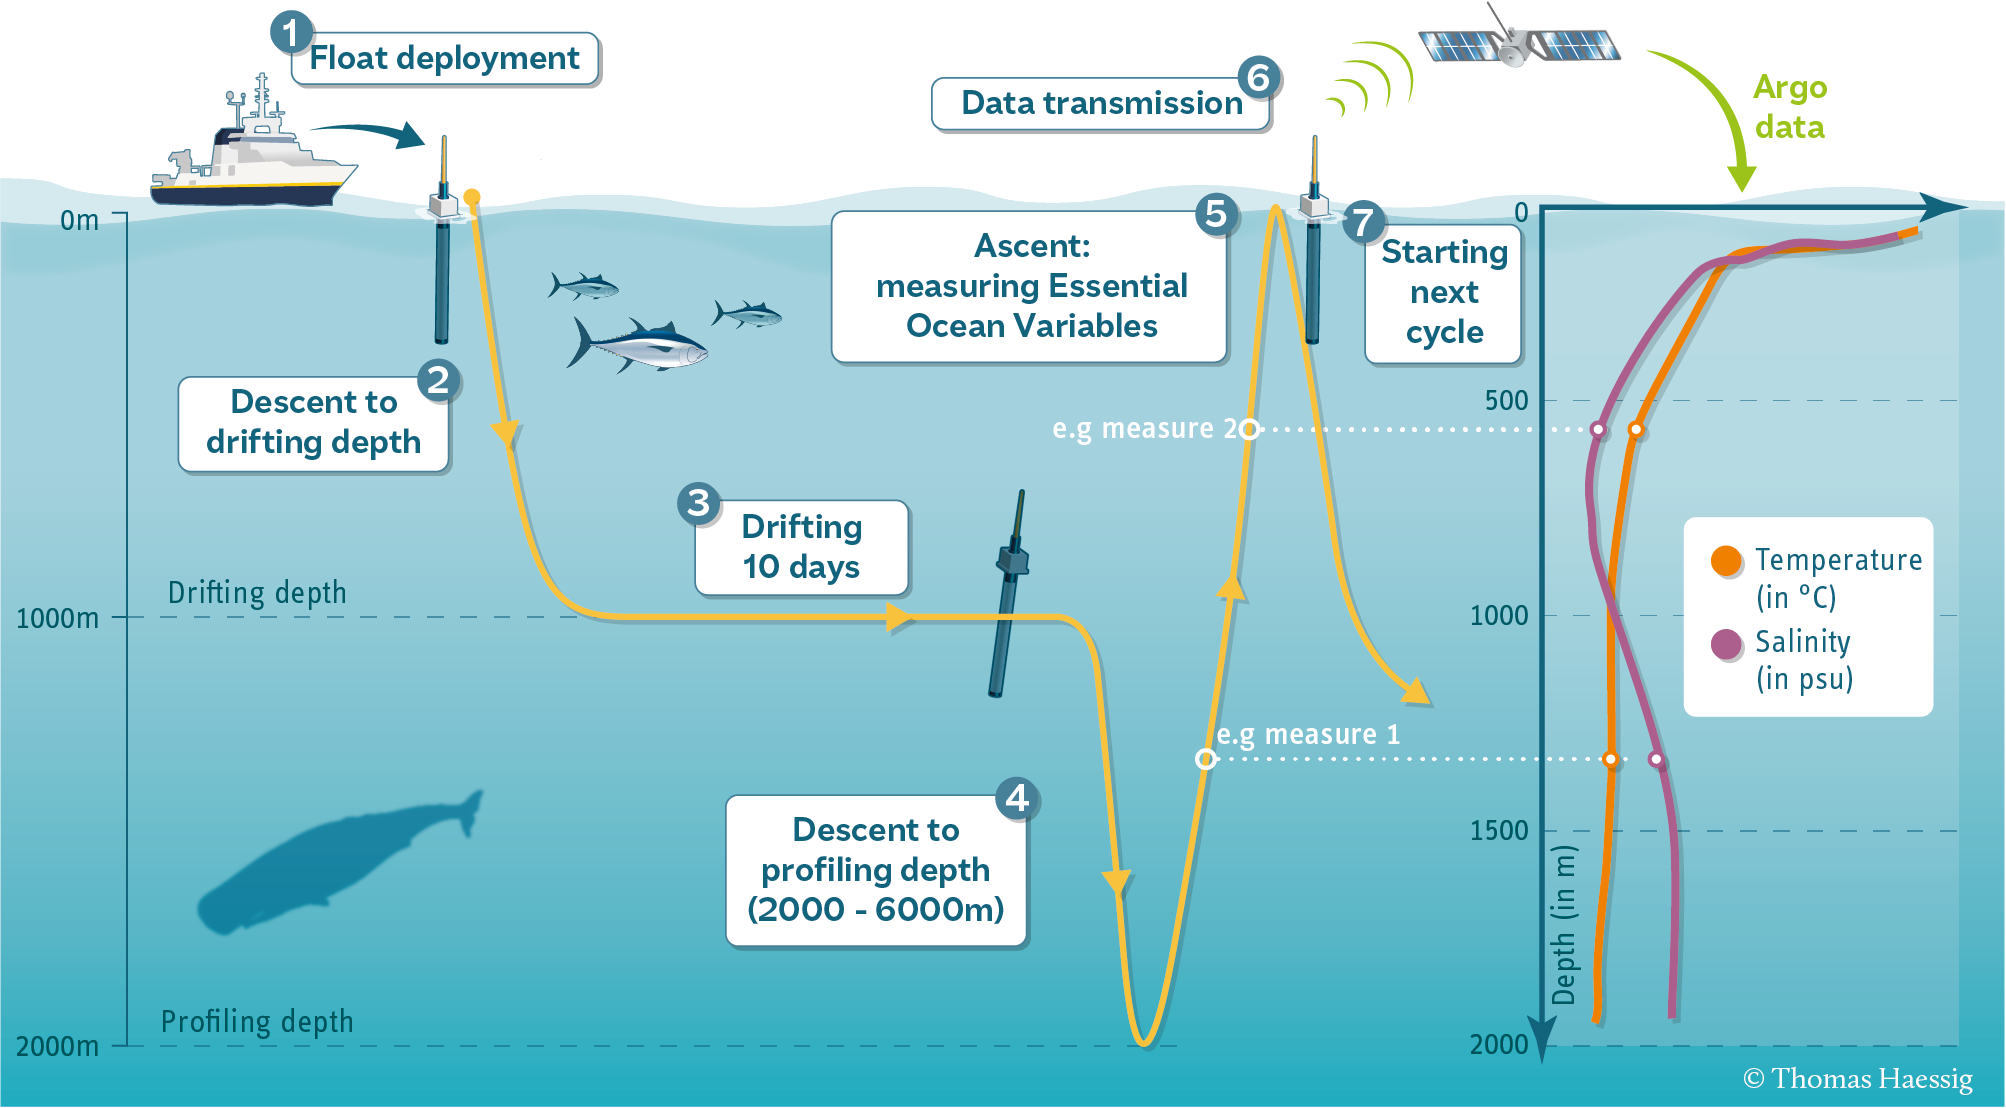


Chaque profil est associé à une latitude, une longitude et une date, ainsi qu'à de nombreux niveaux différents.

Commençons par utiliser [pooch](https://www.fatiando.org/pooch/latest/) pour télécharger les fichiers de données dont nous avons besoin pour cet exercice. Le code suivant vous donnera une liste de fichiers `.npy` que vous pourrez ouvrir à l'étape suivante.

In [1]:
!pip install pooch

In [2]:
import pooch

# URL des fichiers compressés
url = "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ?download=1"

# Télécharger et décompresser les fichiers avec pooch
files = pooch.retrieve(
    url,
    processor=pooch.Unzip(),
    known_hash='2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009'
)

# Afficher la liste des fichiers décompressés
print(files)

Unzipping contents of '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ' to '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip'


['/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy', '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy', '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy', '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy', '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy', '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy', '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy']


In [3]:
import numpy as np

# Liste des chemins de fichiers décompressés
files = [
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy'
]

# Charger les fichiers dans des variables Numpy
S, lon, date, levels, P, lat, T = [np.load(f) for f in files]

# Afficher les formes des tableaux pour vérifier
print("Forme de S (Salinité) :", S.shape)
print("Forme de lon (Longitude) :", lon.shape)
print("Forme de date :", date.shape)
print("Forme de levels (Profondeur) :", levels.shape)
print("Forme de P (Pression) :", P.shape)
print("Forme de lat (Latitude) :", lat.shape)
print("Forme de T (Température) :", T.shape)

Forme de S (Salinité) : (78, 75)
Forme de lon (Longitude) : (75,)
Forme de date : (75,)
Forme de levels (Profondeur) : (78,)
Forme de P (Pression) : (78, 75)
Forme de lat (Latitude) : (75,)
Forme de T (Température) : (78, 75)


In [ ]:
import pooch

url = "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ?download=1"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash='2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009')
files

['/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy']

In [ ]:
import numpy as np

In [ ]:
# Affiche le répertoire de travail actuel
print("Répertoire de travail actuel :", os.getcwd())

# Vérifie les fichiers dans le répertoire courant
print("Fichiers dans le répertoire :", os.listdir('.'))

Répertoire de travail actuel : /content
Fichiers dans le répertoire : ['.config', 'sample_data']


**Q1) Chargez chaque fichier de données sous la forme d'un tableau `numpy`.**

Vous pouvez utiliser les noms que vous voulez pour vos tableaux, mais nous recommandons :

`T` : température

`S` : salinité

`P` : pression

`date` : date

`lat` : latitude

`lon` : longitude

`level` : niveau de profondeur

Astuce 1 : Regardez le nom du fichier (les éléments dans `files`) pour savoir quel fichier correspond à quelle variable.

Astuce 2 : Consultez la documentation de [`np.load`](https://numpy.org/doc/stable/reference/generated/numpy.load.html).

Affichez les noms des éléments des fichiers ici

In [ ]:
[f.split('/')[-1]for f in files]



['P.npy', 'date.npy', 'lat.npy', 'S.npy', 'levels.npy', 'lon.npy', 'T.npy']

Ensuite, chargez les fichiers sous forme de tableaux `numpy`, par exemple en utilisant la compréhension de liste

In [ ]:
files = ['float_data/P.npy', 'float_data/date.npy', 'float_data/lat.npy', 'float_data/S.npy', 'float_data/levels.npy', 'float_data/lon.npy', 'float_data/T.npy']

# Charger chaque fichier en tant que tableau numpy
P, date, lat, S, levels, lon, T = [np.load(f) for f in files]



FileNotFoundError: [Errno 2] No such file or directory: 'float_data/P.npy'

In [ ]:
#@title Code à compléter (au besoin)
P,date,lat,S,levels,lon,T = [np.load for f in ['P.npy', 'date.npy', 'lat.npy', 'S.npy', 'levels.npy', 'lon.npy', 'T.npy']]

**Q2) Recréez le tableau `level` en utilisant `np.arange` et `np.linspace`**.

Conseils :

* La documentation de `np.arange` est [at this link](https://numpy.org/devdocs/reference/generated/numpy.arange.html)
* La documentation pour `np.linspace` est [à ce lien](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
* La documentation pour `np.testing.assert_equal` est [at this link](https://numpy.org/doc/stable/reference/generated/numpy.testing.assert_equal.html)

Affichez le tableau `level` (niveau)

In [5]:
level = [0, 500, 1000, 1500, 2000]


print(level)

[0, 500, 1000, 1500, 2000]


Recréez le tableau `level` en utilisant `np.arange` et l'appeler `level_arange`

In [6]:
start = 0
stop = 2000
step = 500


level_arange = np.arange(start, stop + step, step)


print (level_arange)

[   0  500 1000 1500 2000]


In [ ]:
#@title Code à compléter (au besoin)
level_arange = np.arange(___,___)

Vérifiez que `level` et `level_arange` sont égaux en utilisant `np.testing.assert_equal`

In [7]:
#@title Code à compléter (au besoin)
np.testing.assert_equal(level,level_arange)

Recréer le tableau `level` en utilisant `np.linspace` et l'appeler `level_linspace`

In [8]:
start = 0
stop = 2000
num_points = 5


level_linspace = np.linspace(start, stop, num_points)


print(level_linspace)

[   0.  500. 1000. 1500. 2000.]


In [ ]:
#@title Code à compléter (au besoin)
___ = np.___(___,___,___)

Vérifiez que `level` et `level_linspace` sont égaux en utilisant `np.testing.assert_equal`

In [9]:
np.testing.assert_equal(level,level_linspace)

In [ ]:
#@title Code à compléter (au besoin)
___.___(___,___)

**Q3) Examinez les formes de `T`, `S` et `P` par rapport à `lon`, `lat`, `date` et `niveau`. Comment pensez-vous qu'ils sont liés ?**

Indice : consultez la sous-section [NDArrays](#NDArrays)

Affichez les formes de toutes les variables chargées

In [10]:
print("Forme de S (Salinité) :", S.shape)
print("Forme de lon (Longitude) :", lon.shape)
print("Forme de date :", date.shape)
print("Forme de levels (Profondeur) :", levels.shape)
print("Forme de P (Pression) :", P.shape)
print("Forme de lat (Latitude) :", lat.shape)
print("Forme de T (Température) :", T.shape)

Forme de S (Salinité) : (78, 75)
Forme de lon (Longitude) : (75,)
Forme de date : (75,)
Forme de levels (Profondeur) : (78,)
Forme de P (Pression) : (78, 75)
Forme de lat (Latitude) : (75,)
Forme de T (Température) : (78, 75)


In [ ]:
#@title Code à compléter (au besoin)
___.shape
___.___

D'après les formes, quelles sont les dimensions partagées entre les tableaux ?

**Q4) En vous basant sur la formule ci-dessous, calculez la densité de l'eau de mer `relative_density`, par rapport à l'eau pure, en fonction de la température, de la salinité et de la pression.**

`densité_relative`$ = ρ -ρ_{Eau pure} = a \times S +b \times \Theta + c \times \Theta^{2}$

où :

* Les densités $\rho$ et $ρ_{Pure\ eau}$ sont exprimées en unités $kg/m^{3}$.
* Les constantes $a$, $b$ et $c$ sont fournies ci-dessous.
* La fonction permettant de calculer la température conservative $\Theta$ (en unités Celcius) à partir de la température, de la salinité et de la pression est fournie ci-dessous.
* La température $T$ est exprimée en unités Celcius.
* La salinité $S$ est exprimée en unités $g/kg$.
* La pression $p$ est exprimée en unités $dbar$.

Astuce : Les tableaux `numpy` chargés `temperature`, `salinity`, et `pressure` ont déjà les bonnes unités et aucune conversion n'est nécessaire.

Sources :

1) [*Roquet, Fabien, et al. "Defining a simplified yet "realistic" equation of state for seawater." Journal of Physical Oceanography 45.10 (2015) : 2564-2579.*](https://journals.ametsoc.org/view/journals/phoc/45/10/jpo-d-15-0080.1.xml)

2) [*The Gibbs SeaWater (GSW)
Oceanographic Toolbox of TEOS-10*](https://www.teos-10.org/pubs/gsw/html/gsw_front_page.html). (Licence)](https://www.teos-10.org/pubs/gsw/html/gsw_licence.html)

Voici les constantes a, b et c :

In [11]:
a = 7.718e-1
b = -8.44e-2
c = -4.561e-3

Importons la bibliothèque [`gsw`] (https://teos-10.github.io/GSW-Python/) qui contient la fonction `CS_from_t` pour calculer la température conservative $\Theta$ à partir de la température, de la salinité et de la pression.

In [12]:
!pip install gsw
from gsw import CT_from_t

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 22.1 MB/s eta 0:00:00


Maintenant, c'est à vous de jouer. Voici l'équation pour éviter d'avoir à faire défiler la page vers le haut :

`densité_relative`$ = ρ -ρ_{Pure\ Eau} = a \times S +b \times \Theta + c \times \Theta^{2}$

Calculeuz la température conservatrice

Conseil : utilisez [CT_from_t](https://www.teos-10.org/pubs/gsw/html/gsw_CT_from_t.html)

In [13]:
#@title Code à compléter (au besoin)
Theta = CT_from_t(S,T,P)


print("Forme de Θ (Température conservative) :", Theta.shape)
print("Exemple de valeurs de Θ :", Theta[:5, :5])

Forme de Θ (Température conservative) : (78, 75)
Exemple de valeurs de Θ : [[18.95038389 18.41702486 19.07746816 19.77238856 19.12925912]
 [18.7167823  18.37902205 19.05973411 19.77252704 19.12741738]
 [18.34343364 18.3522886  19.04195407 19.60920298 19.12356822]
 [17.89267968 18.32887516 18.84088828 19.38246357 19.09973084]
 [16.97178006 18.27209681 18.70757426 19.32127208 19.07984478]]


Calculez la "densité relative" à l'aide de l'équation ci-dessus.

In [14]:
#@title Code à compléter (au besoin)
relative_density = a * S + b * Theta + c * Theta**2


print("Forme de la densité relative :", relative_density.shape)
print("Exemple de valeurs de la densité relative :", relative_density[:5, :5])

Forme de la densité relative : (78, 75)
Exemple de valeurs de la densité relative : [[24.26878778 24.30901623 24.18510597 23.87055088 24.07827896]
 [24.32477667 24.32400413 24.19045883 23.87051422 24.07875577]
 [24.45644758 24.33382758 24.19427794 23.91672055 24.0789808 ]
 [24.59446171 24.34744045 24.24444013 23.96769284 24.08205995]
 [24.85335668 24.38409558 24.28933109 23.99060472 24.08720123]]


**Q4) Faites un graphique pour chaque colonne de données dans `T`, `S`, `P`, et
`densité_relative` (quatre plots)**

Pour cette question, nous devons utiliser l'interface [Pyplot](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) de la bibliothèque [Matplotlib](https://matplotlib.org/) pour la visualisation, même si nous ne l'avons pas encore étudiée en profondeur en classe. Mais n'ayez crainte, nous vous fournissons des instructions faciles à suivre ci-dessous. 😊

La première étape consiste à importer Pyplot. Il suffit d'exécuter le code ci-dessous.

In [15]:
import matplotlib.pyplot as plt

Ensuite, nous tracerons les variables en fonction de la profondeur de l'océan, `level`. Il suffit de lire la documentation [sur ce lien] (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) pour en déduire la syntaxe correcte. Etiquetez vos axes en utilisant `plt.xlabel` et `plt.ylabel`, et ajoutez un titre en utilisant `plt.title`.

Astuce : L'échelle verticale doit utiliser les données `level` pour être cohérente avec les conventions océanographiques.

Conseil 2 : Chaque graphique doit avoir une ligne pour chaque colonne de données. Le résultat sera désordonné, comme dans le graphique ci-dessous :

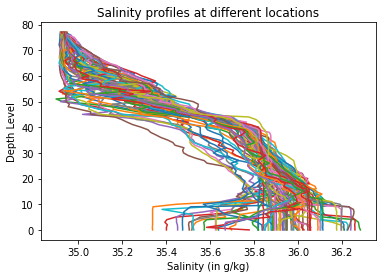

Text(0.5, 1.0, 'Salinity profiles at different locations')

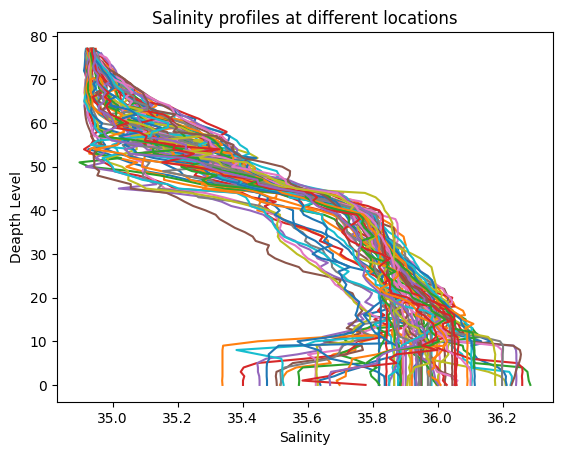

In [19]:
plt.plot(S,levels) ; # Le point-virgule empêche l'impression des objets de ligne
plt.xlabel('Salinity') # Prend une chaîne de caractères comme argument
plt.ylabel('Deapth Level')
plt.title('Salinity profiles at different locations')

Faites plus de plots ci-dessous:

Text(0.5, 1.0, 'Temperature profiles at different locations')

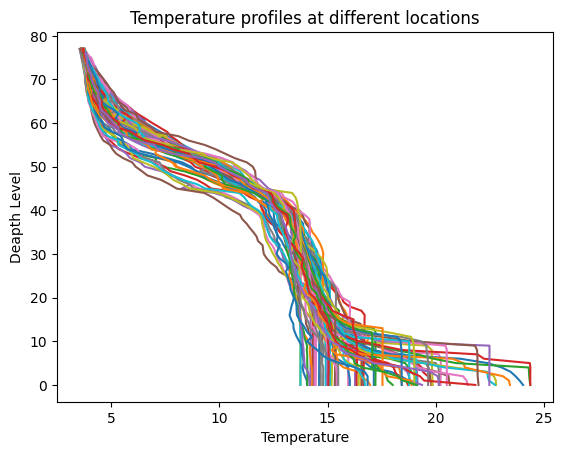

In [20]:
plt.plot(T,levels);
plt.xlabel('Temperature')
plt.ylabel('Deapth Level')
plt.title('Temperature profiles at different locations')


Text(0.5, 1.0, 'Ph profiles at different locations')

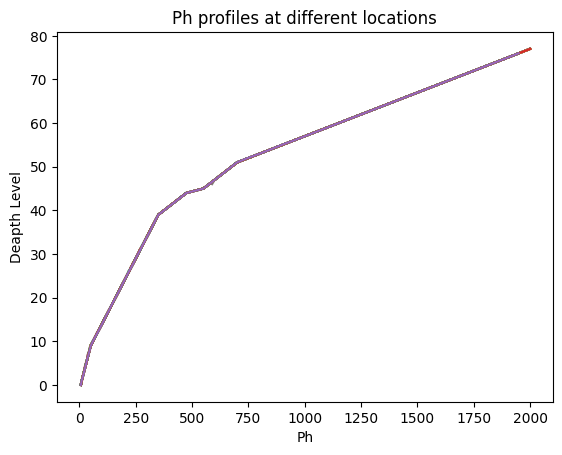

In [21]:
plt.plot(P,levels);
plt.xlabel('Ph')
plt.ylabel('Deapth Level')
plt.title('Ph profiles at different locations')

Text(0.5, 1.0, 'Relative density profiles at different locations')

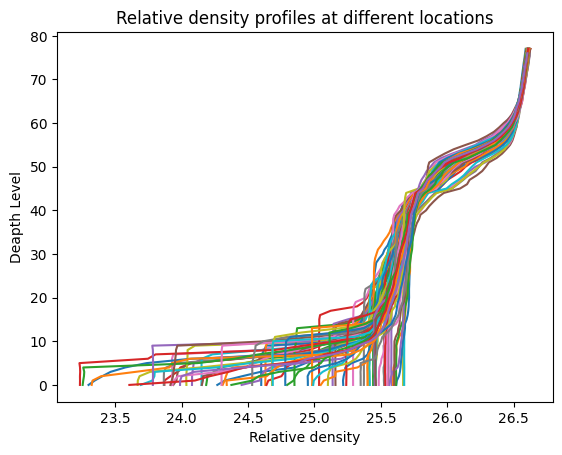

In [22]:
plt.plot(relative_density,levels);
plt.xlabel('Relative density')
plt.ylabel('Deapth Level')
plt.title('Relative density profiles at different locations')

**Q5) Calculez la moyenne et l'écart-type de `T`, `S`, `P`, et `seawater_density` à chaque profondeur dans `level`.

Conseil : Vous pouvez lire la documentation sur [ce lien](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) et [ce lien](https://numpy.org/doc/stable/reference/generated/numpy.std.html).

Conseil 2 : Vous pouvez vérifier que vous avez pris la moyenne et les écarts types le long des axes corrects en vérifiant la "forme" de vos résultats.

Calculez les moyennes...

In [51]:
#@title Code à compléter (au besoin)
T_mean = np.mean(T,axis=1)
S_mean = np.mean(S,axis=1)
P_mean = np.mean(P,axis=1)
relative_density_mean = np.mean(relative_density,axis=1)


print('T_mean =', T_mean)
print('S_mean =', S_mean.shape)
print('P_mean =', P_mean.shape)
print('relative_densitiy_mean =', relative_density_mean.shape)

T_mean = [        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan 10.80430666 10.49702667
 10.1749066   9.83453334  9.48625332  9.19793334  8.66010666  8.12324001
  7.60221333  7.15289333  6.74250667  6.39543999  6.04598667  5.74538665
  5.48913333  5.26604001  5.08768     4.93479998  4.77769334  4.65368
  4.54237334  4.44274664  4.35933333         nan         nan         nan
         nan         nan         nan         nan         nan         nan]
S_mean = (78,)
P_mean = (78,)
relative_densi

... et les écarts types.

In [52]:
#@title Code à compléter (au besoin)
T_std = np.std(T,axis=1)
S_std = np.std (S,axis=1)
P_std = np.std (P,axis=1)
relative_density_std = np.std(relative_density,axis=1)


print('T_std =', T_std)
print('S_std =', S_std.shape)
print('P_std =', P_std.shape)
print('relative_densitiy_std =', relative_density_std.shape)

T_std = [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.84204226 0.90031954
 0.94661515 0.9902255  1.01786435 1.01690775 1.01944275 0.97987767
 0.94359878 0.88207755 0.82934499 0.7859263  0.71755907 0.68351183
 0.64382025 0.58990336 0.55077313 0.50187175 0.45673872 0.4085324
 0.36748504 0.33272584 0.2996815         nan        nan        nan
        nan        nan        nan        nan        nan        nan]
S_std = (78,)
P_std = (78,)
relative_densitiy_std = (78,)


Vérifiez qu'elles ont la même forme que vos coordonnées de niveau vertical `lev` :

In [30]:
#@title Code à compléter (au besoin)
np.testing.assert_equal(T_mean.shape,levels.shape)

**Q6) Faites maintenant des tracés similaires, mais ne montrez que les moyennes `T`, `S`, `P`, et `densité_de_l'eau_de_mer` à chaque profondeur. Faites apparaître les barres d'erreur sur chaque graphique en utilisant les écarts-types**.

Astuce : Si vous vous sentez aventureux, vous pouvez utiliser directement la fonction [`plt.errorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html).

Astuce 2 : Vous devriez obtenir des graphiques similaires à celui ci-dessous

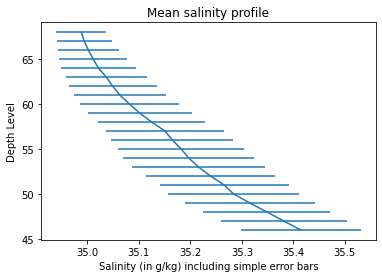

Text(0.5, 1.0, 'Mean salinity profile')

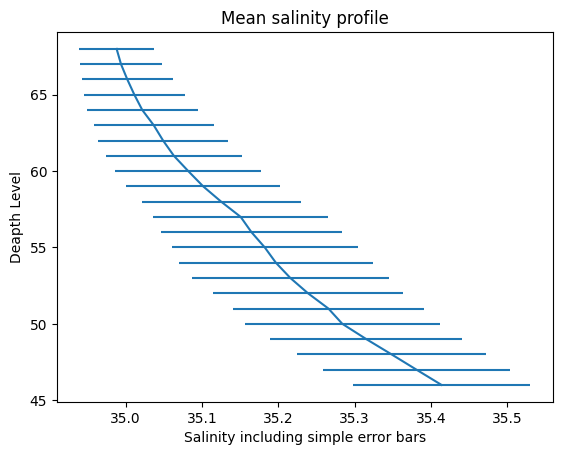

In [33]:
plt.errorbar(S_mean,levels,xerr=S_std)
plt.xlabel('Salinity including simple error bars')
plt.ylabel('Deapth Level')
plt.title('Mean salinity profile')

Encore trois plots et nous serons prêts 🙂 .

Text(0.5, 1.0, 'Mean temperature profile')

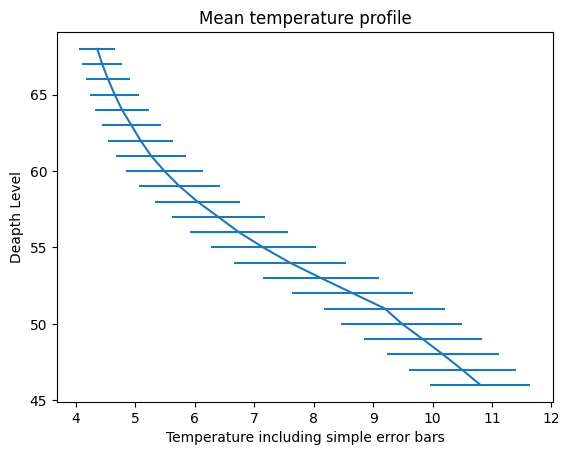

In [35]:
plt.errorbar(T_mean,levels,xerr=T_std)
plt.xlabel('Temperature including simple error bars')
plt.ylabel('Deapth Level')
plt.title('Mean temperature profile')

Text(0.5, 1.0, 'Mean pressure profile')

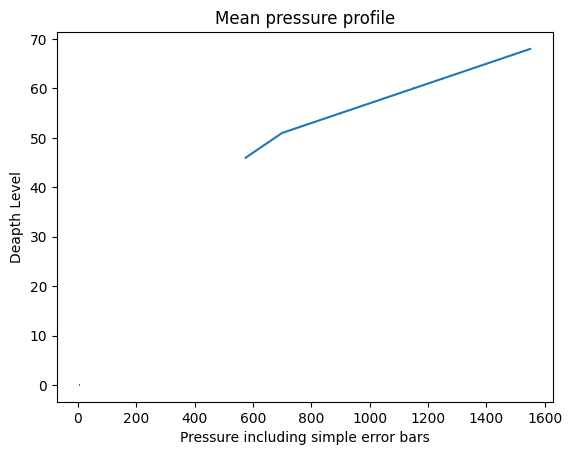

In [36]:
plt.errorbar(P_mean,levels,xerr=P_std)
plt.xlabel('Pressure including simple error bars')
plt.ylabel('Deapth Level')
plt.title('Mean pressure profile')

Text(0.5, 1.0, 'Mean relative density profile')

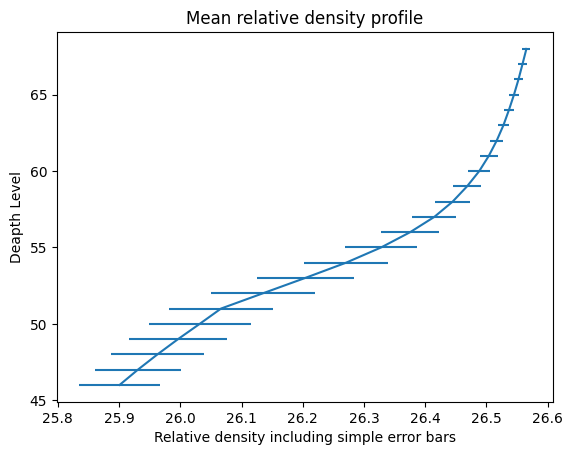

In [37]:
plt.errorbar(relative_density_mean,levels,xerr=relative_density_std)
plt.xlabel('Relative density including simple error bars')
plt.ylabel('Deapth Level')
plt.title('Mean relative density profile')

**Q7) Prise en compte des données manquantes**

Les profils contiennent de nombreuses valeurs manquantes. Celles-ci sont indiquées par la valeur spéciale "Not a Number", ou `np.nan`.

Lorsque vous prenez la moyenne ou l'écart type des données contenant des NaN, le résultat entier devient `NaN`. Au lieu de cela, si vous utilisez les fonctions spéciales `np.nanmean` et `np.nanstd`, vous dites à NumPy d'ignorer les NaN.

Recalculez les moyennes et les écarts types comme dans les sections précédentes en utilisant ces fonctions et tracez les résultats.

Conseil : Liens vers la documentation [`np.nanmean`](https://numpy.org/doc/stable/reference/generated/numpy.nanmean.html) et la documentation [`np.nanstd`](https://numpy.org/doc/stable/reference/generated/numpy.nanstd.html).

Recalculez les moyennes ci-dessous en ignorant les valeurs manquantes. Nous espérons que vous pouvez maintenant trouver la syntaxe complète vous-même 😎

In [50]:
T_nanmean = np.nanmean(T,axis=1)
S_nanmean = np.nanmean(S,axis=1)
P_nanmean = np.nanmean(P,axis=1)
relative_density_nanmean = np.nanmean(relative_density,axis=1)


print('T_nanmean =', T_nanmean)
print('S_nanmean =', S_nanmean.shape)
print('P_nanmean =', P_nanmean.shape)
print('relative_densitiy_nanmean =', relative_density_nanmean.shape)


T_nanmean = [17.60172602 17.57223609 17.5145833  17.42326395 17.24943838 17.03730134
 16.76787661 16.44609588 16.17439195 16.04501356 15.65827023 15.4607296
 15.26114862 15.12489191 14.99133783 14.90160808 14.81990544 14.74535139
 14.66822971 14.585027   14.49732434 14.41904053 14.35412163 14.27102702
 14.19081082 14.11487838 14.04347293 13.98067566 13.90994595 13.83274319
 13.76139196 13.69836479 13.62335132 13.54185131 13.46647295 13.39395946
 13.32541891 13.25205403 13.18131082 13.10233782 12.89268916 12.67795943
 12.4649189  12.2178513  11.98270268 11.1281081  10.80430666 10.49702667
 10.1749066   9.83453334  9.48625332  9.19793334  8.66010666  8.12324001
  7.60221333  7.15289333  6.74250667  6.39543999  6.04598667  5.74538665
  5.48913333  5.26604001  5.08768     4.93479998  4.77769334  4.65368
  4.54237334  4.44274664  4.35933333  4.2653784   4.17290539  4.08902703
  3.99864865  3.92163514  3.85617567  3.78916217  3.72950001  3.66207691]
S_nanmean = (78,)
P_nanmean = (78,)
relati

De même, recalculez les écarts types en ignorant les valeurs manquantes.

In [49]:
T_nanstd = np.nanstd(T,axis=1)
S_nanstd = np.nanstd(S,axis=1)
P_nanstd = np.nanstd(P,axis=1)
relative_density_nanstd = np.nanstd(relative_density,axis=1)


print('T_nanstd =', T_nanstd)
print('S_nanstd =', S_nanstd.shape)
print('P_nanstd =', P_nanstd.shape)
print('relative_densitiy_nanstd =', relative_density_nanstd.shape)

T_nanstd = [2.92500898 2.86405591 2.83324563 2.75112353 2.60248422 2.42649165
 2.20220589 1.99752543 1.79105862 1.74132795 1.26608465 1.07857596
 0.89761236 0.79748479 0.68525328 0.6394096  0.61835635 0.59387877
 0.56010736 0.55009107 0.53183794 0.52634089 0.52668259 0.51009182
 0.49376838 0.48980214 0.48551874 0.48516171 0.49244536 0.50557331
 0.50881718 0.50482633 0.50093284 0.51411271 0.50962002 0.51399949
 0.52544584 0.53182873 0.5466501  0.55060902 0.56066216 0.57937588
 0.5989958  0.63392862 0.70640057 0.85775269 0.84204226 0.90031954
 0.94661515 0.9902255  1.01786435 1.01690775 1.01944275 0.97987767
 0.94359878 0.88207755 0.82934499 0.7859263  0.71755907 0.68351183
 0.64382025 0.58990336 0.55077313 0.50187175 0.45673872 0.4085324
 0.36748504 0.33272584 0.2996815  0.25570195 0.21802589 0.17365755
 0.14408683 0.11509768 0.09214697 0.08062746 0.06846311 0.06550644]
S_nanstd = (78,)
P_nanstd = (78,)
relative_densitiy_nanstd = (78,)


**Q8) Créez un diagramme de dispersion des coordonnées longitudinales (`lon`) et latitudinales (`lat`) des flotteurs ARGO.**

Encore une fois, nous n'en avons pas parlé dans le tutoriel, mais il existe une fonction de diagramme de dispersion très pratique appelée [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) fournie par l'interface Pyplot.

Bonus : Etiqueter votre figure en utilisant `plt.xlabel`, `plt.ylabel`, et `plt.title`.

Bonus 2 : Augmentez la taille de police de vos étiquettes en ajoutant un argument `fontsize=` aux fonctions d'étiquettes.

Bonus 3 : Rendez votre diagramme de dispersion plus beau en changeant les arguments de [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) listés dans la documentation, par exemple `s=`.

Text(0.5, 1.0, 'Mean pressure profile')

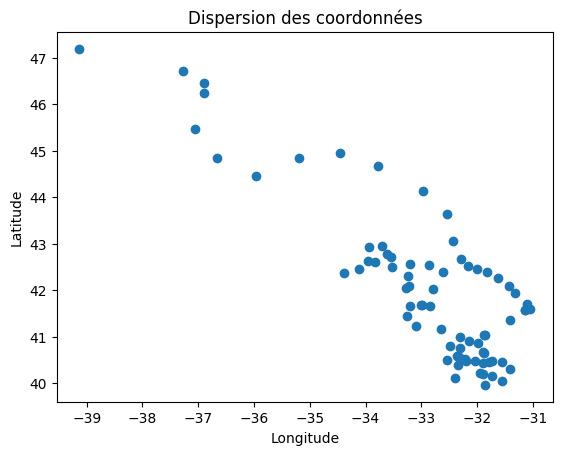

In [54]:
#@title Code à compléter (au besoin)
plt.scatter(lon,lat)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Dispersion des coordonnées') # Bonus
___ # Plus de bonus

## Fonctions

**Q1) Ecrivez une fonction pour convertir l'unité que vous avez choisie pour les masses planétaires en $M_{Terre}$, la masse de la Terre**.

Par exemple, la masse de Jupiter est :

$M_{Jupiter} \approx 1898\times10^{24}kg \approx 318 M_{Terre}$

In [61]:
planetdict = {'mercure':0.330,'vénus':4.87,'terre':5.97,
              'mars':0.642,'jupiter':1898,'saturne':568,'uranus':86.8,'nepturne':102, 'pluto':0.013}

# unit: 10^24 kg

In [ ]:
# Ecrivez votre fonction ici
# La fonction doit prendre la masse de la planète que vous voulez (par exemple, planetdict['mars']) et la diviser par la masse de la Terre.
# (planetdict['terre'])

# Testez que cela fonctionne pour jupiter (planetdict['jupiter']), la fonction devrait retourner 317.92294807370183


In [62]:
#@title Code à compléter (au besoin)
# Ecrivez votre fonction ici
# La fonction doit prendre la masse de la planète que vous voulez (par exemple, planetdict['mars']) et la diviser par la masse de la Terre.
# (planetdict['terre'])
def convert_mass_Mterre(mass_terre = 5.97):
  return planetdict['jupiter']/planetdict['terre']

#tester que cela fonctionne pour jupiter (planetdict['jupiter']), la fonction devrait retourner 317.92294807370183
convert_mass_Mterre('jupiter')

317.92294807370183

**Q2) Ecrivez maintenant une fonction unique qui peut convertir l'unité que vous avez choisie pour les masses planétaires en $M_{Terre}$ ou $M_{Jupiter}$ selon le mot-clé que vous avez spécifié**.

In [ ]:
# Écrivez votre fonction ici

# Vérifiez que votre fonction fonctionne : convertissez Mjupiter en Mterre et Mjupiter,
# Vous devriez voir 317.923 (Mterre) et 1.0 (Mjupiter)

In [66]:
#@title Code à compléter (au besoin)
# Écrivez votre fonction ici
def convert_m_Mterrejupiter(mass_terre=5.97,ourplanet='jupiter') :
  return mass_terre/planetdict[ourplanet]

# Vérifiez que votre fonction fonctionne : convertissez Mjupiter en Mterre et Mjupiter,
# Vous devriez voir 317.923 (Mterre) et 1.0 (Mjupiter)
print(convert_m_Mterrejupiter(planetdict['jupiter'],'terre')),(convert_m_Mterrejupiter(planetdict['jupiter'],'jupiter'))

317.92294807370183


(None, 1.0)

In [79]:
# Stocker le Mjupiter pour Q3
Mjupiter = convert_m_Mterrejupiter(planetdict['jupiter'], 'terre')

**Q3) Ecrivez une fonction qui prend un argument (la masse en $M_{Jupiter}$) et renvoie deux arguments (la masse en $M_{Terre}$ et la masse dans l'unité que vous avez choisie [la planète que vous voulez]).

In [ ]:
# Écrivez votre fonction ici
# Vérifiez que la conversion de la masse de Jupiter en $M_{Terre}$ et en $M_{Terre}$ fonctionne.
# l'unité choisie (par exemple, la planète Mars)

In [81]:
#@title Code à compléter (au besoin)
# Écrivez votre fonction ici
def mass_conversion_two_arguments(Mjupiter,planet='mars') :
  a = Mjupiter/planetdict['jupiter'] # Terre
  b = Mjupiter/planetdict[planet] # La planète que vous voulez utiliser comme référence
  return a,b
# Vérifiez que la conversion de la masse de Jupiter en $M_{Terre}$ et en $M_{Terre}$ fonctionne.
# l'unité choisie (par exemple, la planète Mars)
print(mass_conversion_two_arguments('jupiter','mars'))

TypeError: unsupported operand type(s) for /: 'str' and 'float'

In [ ]:
# Bonus : Utilisez la fonction de Q10 pour convertir la masse de Neptune en $M_{Jupiter}$.
# puis la fonction de Q3 pour la reconvertir dans l'unité que vous avez choisie
# Retrouvez-vous la valeur originale ?